# Project objectives

The project had three primary goals:

1. Collect climate data from the capital cities of Spain between 1963 and 2022.
2. Analyze the collected weather dataset.
3. Identify changes in weather patterns that could indicate global warming or other types of climate change.


<a name="top"></a>
 
## Table of Contents 
* [1. Data collection and preprocessing](#item1)
    * [1.1. Information about the capitals of Spain](#item1.1)
        * [1.1.1. Data collection](#item1.1.1)
    * [1.2. Climate of the capitals of Spain from 1963 to 2022](#item1.2)
        * [1.2.1. Data collection](#item2.1.1)
        * [1.2.1. Data preprocessing](#item2.1.2)
* [2. Data analysis](#item2)
    * [2.1. Annual climate anomaly](#item2.1)
        * [2.1.1. Basemap animation about annual climate anomaly](#item2.1.1)
            * [2.1.1.1. Folium map](#item2.1.1.1)
            * [2.1.1.2. Web scraping](#item2.1.1.2)
        * [2.1.2. Bar chart about annual temperature anomaly](#item2.1.2)
        * [2.1.3. Top 10 Spanish Capital Cities](#item2.1.3)
    * [2.2. Monthly temperature anomaly](#item2.2)
        * [2.2.1. Animation about monthly climate anomaly](#item2.2.1)
        * [2.2.2. Bar and line chart monthly temperature anomaly](#item2.2.2)

In [514]:
import pandas as pd
import numpy as np
import requests
from pprint import pprint
from time import sleep
import plotly.express as px
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
import os
import folium
import imageio
from PIL import Image
from webdriver_manager.chrome import ChromeDriverManager
import time

<a name="item1"></a>
# 1. Data collection and  preprocessing
<a name="item1.1"></a>
## 1.1. Information about the capitals of Spain
<a name="item1.1.1"></a>
### 1.1.1. Data collection

The data for the capitals of Spain are extracted from Opendatasoft.

For this project, the following data for each capital is used:

- Name of the capital city 
- Autonomous Community
- Latitude and longitude

In [515]:
def Datos_geograficos():
    endpoint="https://public.opendatasoft.com/api/records/1.0/search/?dataset=provincias-espanolas&q=&rows=52&sort=provincia&facet=ccaa&facet=provincia"
    response = requests.get(url=endpoint)
    
    Ciudad=list()
    Ccaa=list() 
    Lat=list()
    Long=list()

    for item in response.json()["records"]:

        ciudad = item["fields"]["texto"]
        ccaa = item["fields"]["ccaa"]
        lat = item["fields"]["geo_point_2d"][0]
        lon = item["fields"]["geo_point_2d"][1]

        Ciudad.append(ciudad)
        Ccaa.append(ccaa)
        Lat.append(lat)
        Long.append(lon)

    df = pd.DataFrame()
    df["Capital City"]=Ciudad
    df["Autonomous Community"]=Ccaa
    df["Latitude"]=Lat
    df["Longitude"]=Long
    df["Latitude"] = df["Latitude"].apply(lambda x : round(x,2)).values
    df["Longitude"] = df["Longitude"].apply(lambda x : round(x,2)).values
    
    return df

In [516]:
df_prov = Datos_geograficos()

In [517]:
df_prov

Capital City        Autonomous Community  Latitude  Longitude
0                La Coruña                     Galicia     43.13      -8.46
1                 Alicante        Comunitat Valenciana     38.48      -0.57
2                 Albacete        Castilla - La Mancha     38.83      -1.98
3                  Almería                   Andalucía     37.20      -2.34
4                    Álava                  País Vasco     42.84      -2.72
5                 Asturias     Asturias, Principado de     43.29      -5.99
6                    Ávila             Castilla y León     40.57      -4.95
7                  Badajoz                 Extremadura     38.71      -6.14
8                Barcelona                    Cataluña     41.73       1.98
9                  Vizcaya                  País Vasco     43.24      -2.85
10                  Burgos             Castilla y León     42.37      -3.59
11                 Cáceres                 Extremadura     39.71      -6.16
12                   Cádiz                   Andalucía     36.55      -5.76
13               Cantabria                   Cantabria     43.20      -4.03
14               Castellón        Comunitat Valenciana     40.24      -0.15
15                   Ceuta                       Ceuta     35.89      -5.34
16             Ciudad Real        Castilla - La Mancha     38.93      -3.83
17                 Córdoba                   Andalucía     37.99      -4.81
18                  Cuenca        Castilla - La Mancha     39.90      -2.20
19               Guipúzcoa                  País Vasco     43.14      -2.19
20                  Gerona                    Cataluña     42.13       2.67
21                 Granada                   Andalucía     37.31      -3.27
22             Guadalajara        Castilla - La Mancha     40.81      -2.62
23                  Huelva                   Andalucía     37.58      -6.83
24                  Huesca                      Aragón     42.20      -0.07
25          Islas Baleares               Illes Balears     39.58       2.91
26                    Jaén                   Andalucía     38.02      -3.44
27                La Rioja                   Rioja, La     42.27      -2.52
28              Las Palmas                    Canarias     28.36     -14.55
29                    León             Castilla y León     42.62      -5.84
30                  Lleida                    Cataluña     42.04       1.05
31                    Lugo                     Galicia     43.01      -7.45
32                  Madrid         Comunidad de Madrid     40.50      -3.72
33                  Málaga                   Andalucía     36.81      -4.73
34                 Melilla                     Melilla     35.29      -2.95
35                  Murcia            Región de Murcia     38.00      -1.49
36                 Navarra  Comunidad Foral de Navarra     42.67      -1.65
37                  Orense                     Galicia     42.20      -7.59
38                Palencia             Castilla y León     42.37      -4.54
39              Pontevedra                     Galicia     42.44      -8.46
40               Salamanca             Castilla y León     40.80      -6.07
41  Santa Cruz de Tenerife                    Canarias     28.31     -17.02
42                 Segovia             Castilla y León     41.17      -4.05
43                 Sevilla                   Andalucía     37.44      -5.68
44                   Soria             Castilla y León     41.62      -2.59
45               Tarragona                    Cataluña     41.09       0.82
46                  Teruel                      Aragón     40.66      -0.82
47                  Toledo        Castilla - La Mancha     39.79      -4.15
48                Valencia        Comunitat Valenciana     39.37      -0.80
49              Valladolid             Castilla y León     41.63      -4.85
50                  Zamora             Castilla y León     41.73      -5.98
51                Zaragoza                      Aragón     41.

In [518]:
#df_prov.to_csv("Provincies.csv")

<a name="item1.2"></a>
## 1.2. Climate of the capitals of Spain from 1963 to 2022

Weather data for each capital is collected from the Open Meteo API between 01/01/1963 and 31/12/2022.

Open Meteo is available for non-commercial use and allows for less than 10,000 daily API calls. However, this limit did not exist when I wrote the code.

In this study, we analyzed the variables of temperature, precipitation, wind and snow. The table below provides the name of each variable in the repository, its corresponding name in the API, the unit of measurement, and a brief description of each variable.

|Variable|Variable name in API|Unit|Description|
|---------------|----------------------|-----|--------------------------------------|
|Mean Temperature|temperature_2m_mean|°C|Mean daily air temperature at 2 meters above ground|
|Maximum Temperature|temperature_2m_max|°C|Maximum daily air temperature at 2 meters above ground|
|Minimum Temperature|temperature_2m_min|°C|Minimum daily air temperature at 2 meters above ground|
|Total Precipitation|precipitation_sum|mm|Sum of daily precipitation (including rain, showers and snowfall)|
|Total Snowfall|snowfall_sum|cm|Sum of daily snowfall|
|Maximum Wind Speed|wind_speed_10m_max|km/h|Maximum wind speed on a day|

<a name="item1.2.1"></a>
### 1.2.1. Data collection

In [519]:
base_url = "https://archive-api.open-meteo.com/v1/archive?"

#Date range to analyze

#start_date = "1963-01-01"
#end_date   = "2022-12-31"

start_date = "2022-12-01"
end_date   = "2022-12-31"

#Variables requested from the API
variables = 'temperature_2m_mean,temperature_2m_max,temperature_2m_min,precipitation_sum,snowfall_sum,windspeed_10m_max'

In [520]:
def Weather_data_collection(base_url, variables, start_date, end_date, lat, lon):
    
    #Endpoint and response
    endpoint = f"{base_url}latitude={lat}&longitude={lon}&start_date={start_date}&end_date={end_date}&daily={variables}&&timezone=Europe%2FBerlin"
    response = requests.get(url = endpoint)
    
    return response

In [521]:
responses = []

for lat,lon in zip (df_prov["Latitude"].values,df_prov["Longitude"].values):
    
    # data collection
    responses.append(Weather_data_collection(base_url, variables, start_date,end_date,lat,lon))

    sleep(1)

<a name="item1.2.2"></a>
### 1.2.2. Data preprocessing

In [10]:
def Transformation(response, df_prov):

    data = pd.DataFrame(response.json()['daily'])
    
    data["Capital City"]         = df_prov["Capital City"][i]
    data["Autonomous Community"] = df_prov["Autonomous Community"][i]
    data["Latitude"]             = df_prov["Latitude"][i]
    data["Longitude"]            = df_prov["Longitude"][i]
    
    data.rename(columns = {'time':'Time', 
                           'temperature_2m_mean':'Temperature mean',
                           'temperature_2m_max':'Temperature max', 
                           'temperature_2m_min':'Temperature min', 
                           'precipitation_sum':'Precipitation sum', 
                           'snowfall_sum':'Snowfall sum',
                           'windspeed_10m_max':'Windspeed max'},inplace=True)
    
    data["Time"] = pd.to_datetime(data["Time"], errors='coerce')
    
    return data

In [12]:
data_weather = pd.DataFrame()

for i in range(len(responses)):
    
        # Vertical concatenation
        data_aux = Transformation(responses[i], df_prov)
        data_weather = pd.concat([data_weather, data_aux], axis = 0)

data_weather = data_weather.reset_index(drop = True)

data_weather

Time  Temperature mean  Temperature max  Temperature min  \
0    2022-12-01               7.5             10.9              2.7   
1    2022-12-02               5.3             11.5              1.6   
2    2022-12-03               4.5              8.3              2.1   
3    2022-12-04               4.4              9.3             -0.9   
4    2022-12-05               7.7             11.5              5.2   
...         ...               ...              ...              ...   
1607 2022-12-27               9.5             14.8              6.5   
1608 2022-12-28               8.6             13.3              4.2   
1609 2022-12-29              12.1             15.6              9.4   
1610 2022-12-30              14.1             17.7             11.0   
1611 2022-12-31              11.6             15.7              7.3   

      Precipitation sum  Snowfall sum  Windspeed max Capital City  \
0                   0.0           0.0           15.9    La Coruña   
1                   0.0           0.0           14.8    La Coruña   
2                   0.1           0.0           20.3    La Coruña   
3                   0.0           0.0           11.5    La Coruña   
4                   0.0           0.0           18.1    La Coruña   
...                 ...           ...            ...          ...   
1607                0.0           0.0           11.8     Zaragoza   
1608                0.0           0.0           12.0     Zaragoza   
1609                1.5           0.0           20.8     Zaragoza   
1610                0.0           0.0           24.5     Zaragoza   
1611                0.0           0.0           19.4     Zaragoza   

     Autonomous Community  Latitude  Longitude  
0                 Galicia     43.13      -8.46  
1                 Galicia     43.13      -8.46  
2                 Galicia     43.13      -8.46  
3                 Galicia     43.13      -8.46  
4                 Galicia     43.13      -8.46  
...                   ...       ...        ...  
1607               Aragón     41.62      -1.06  
1608               Aragón     41.62      -1.06  
1609               Aragón     41.62      -1.06  
1610               Aragón     41.62      -1.06  
1611               Aragón     41.62      -1.06  

[1612 rows x 11 columns]

In [51]:
#data_weather.to_csv("Weather.csv")

In [522]:
data_weather = pd.read_csv("Weather.csv", index_col=0, header=0)
data_weather['Time'] = pd.to_datetime(data_weather['Time'])

In [523]:
data_weather.head(5)

Time  Mean Temperature  Maximum Temperature  Minumum Temperature  \
0 1963-01-01               4.3                  5.9                  3.1   
1 1963-01-02               5.5                  6.6                  2.9   
2 1963-01-03               3.5                  6.9                  0.6   
3 1963-01-04               6.6                 10.6                  3.7   
4 1963-01-05               9.4                 10.5                  8.5   

   Total Precipitation  Total Snowfall  Maximum Wind Speed Capital City  \
0                 27.3             0.0                19.1    La Coruña   
1                 26.2             0.0                23.1    La Coruña   
2                  3.3             0.0                17.6    La Coruña   
3                  8.1             0.0                26.8    La Coruña   
4                  5.2             0.0                28.2    La Coruña   

  Autonomous Community  Latitude  Longitude  
0              Galicia     43.13      -8.46  
1              Galicia     43.13      -8.46  
2              Galicia     43.13      -8.46  
3              Galicia     43.13      -8.46  
4              Galicia     43.13      -8.46

In [174]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139580 entries, 0 to 1139579
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Time                  1139580 non-null  datetime64[ns]
 1   Mean Temperature      1139580 non-null  float64       
 2   Maximum Temperature   1139580 non-null  float64       
 3   Minumum Temperature   1139580 non-null  float64       
 4   Total Precipitation   1139580 non-null  float64       
 5   Total Snowfall        1139580 non-null  float64       
 6   Maximum Wind Speed    1139580 non-null  float64       
 7   Capital City          1139580 non-null  object        
 8   Autonomous Community  1139580 non-null  object        
 9   Latitude              1139580 non-null  float64       
 10  Longitude             1139580 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 104.3+ MB


<a name="item2"></a>
# 2. Data analysis

<a name="item2.1"></a>
## 2.1. Annual climate anomaly



In [524]:
def Anomaly_annual (df,variable):
    
# From 1963 to 2022, the average of each variable was calculated for every capital city.
    
    data_city = df.groupby("Capital City")[variable].mean().reset_index()
    
    for i in variable:
        data_city = data_city.rename(columns={i: f'Historical average {i}'})
    
# The annual average of each variable is calculated for every capital city.
    data_group = df.groupby(["Capital City",df["Time"].dt.year])[variable].mean().reset_index()

    for i in variable:
        
        data_group = data_group.rename(columns={i: f'Average annual {i}'})
    
# The anomaly of each variable is calculated for every capital city.
    data_group = pd.merge(data_group, data_city, on="Capital City", how="left")

    for i in variable:

        data_group[f"{i} anomaly"] = data_group[f"Average annual {i}"] - data_group[f"Historical average {i}"]
    
    data_group = data_group.rename(columns={'Time':'Year'})
    
    data_group = data_group.round(2)
    
    return data_group

In [525]:
variable = ['Mean Temperature','Total Precipitation','Total Snowfall','Maximum Wind Speed']
data_group = Anomaly_annual(data_weather,variable)

In [526]:
data_anomaly_annual= data_group[['Capital City','Year','Mean Temperature anomaly','Total Precipitation anomaly','Total Snowfall anomaly','Maximum Wind Speed anomaly']]

In [527]:
data_anomaly_annual.head(5)

Capital City  Year  Mean Temperature anomaly  Total Precipitation anomaly  \
0     Albacete  1963                     -0.73                         0.03   
1     Albacete  1964                      0.01                        -0.29   
2     Albacete  1965                     -0.36                        -0.02   
3     Albacete  1966                     -0.16                        -0.19   
4     Albacete  1967                     -0.31                         0.12   

   Total Snowfall anomaly  Maximum Wind Speed anomaly  
0                   -0.02                        0.41  
1                    0.01                       -0.61  
2                    0.04                        0.67  
3                   -0.03                        0.64  
4                    0.01                       -0.40

In [440]:
#data_anomaly_annual.to_csv("Anomaly annual.csv", decimal=',')

<a name="item2.1.1"></a>
### 2.1.1. Basemap animation about annual temperature anomaly

In this section, I created a basemap animation showcasing the change in annual mean temperature over time for the capital cities of Spain. The aim is to illustrate the temperature change that occurred from 1963 to 2022.

First, I utilized the Folium library to create a map for different years. This library saves the map in HTML format in a folder on your computer. Each map has markers of different colors and sizes that symbolize the temperature anomaly of that particular year. 

Second, I used web scraping to open the HTML and take a screenshot of each map.

Finally, I used the imagio library to generate a basemap animation from the screenshot.

In [441]:
data_anomaly_annual = data_anomaly_annual.merge(df_prov, how="right")

In [442]:
data_anomaly_annual.head(5)

Capital City  Year  Mean Temperature anomaly  Total Precipitation anomaly  \
0    La Coruña  1963                     -0.79                         0.65   
1    La Coruña  1964                     -0.32                        -0.45   
2    La Coruña  1965                     -0.49                         0.19   
3    La Coruña  1966                      0.15                         1.08   
4    La Coruña  1967                     -0.35                        -0.31   

   Total Snowfall anomaly  Maximum Wind Speed anomaly Autonomous Community  \
0                    0.01                        0.82              Galicia   
1                   -0.00                       -1.04              Galicia   
2                    0.01                        0.27              Galicia   
3                   -0.00                        1.15              Galicia   
4                    0.00                        0.22              Galicia   

   Latitude  Longitude  
0     43.13      -8.46  
1     43.13      -8.46  
2     43.13      -8.46  
3     43.13      -8.46  
4     43.13      -8.46

I sorted the anomalous temperatures in ascending order to find outliers. I observed that the initial values for the capitals of Orense and Pontevedra were significantly different from the preceding values. Therefore, I considered the second value as the minimum value to normalize the dataset.

In [443]:
data_anomaly_annual[data_anomaly_annual['Capital City']=='Pontevedra'].sort_values(by='Mean Temperature anomaly', ascending=True).head(5)

Capital City  Year  Mean Temperature anomaly  \
2355   Pontevedra  1978                     -3.15   
2349   Pontevedra  1972                     -1.17   
2348   Pontevedra  1971                     -1.00   
2354   Pontevedra  1977                     -0.91   
2351   Pontevedra  1974                     -0.73   

      Total Precipitation anomaly  Total Snowfall anomaly  \
2355                         0.31                   -0.00   
2349                         0.16                    0.05   
2348                        -0.10                    0.01   
2354                         0.78                   -0.00   
2351                        -0.01                   -0.01   

      Maximum Wind Speed anomaly Autonomous Community  Latitude  Longitude  
2355                       -2.60              Galicia     42.44      -8.46  
2349                        0.59              Galicia     42.44      -8.46  
2348                       -0.84              Galicia     42.44      -8.46  
2354                        0.11              Galicia     42.44      -8.46  
2351                        0.87              Galicia     42.44      -8.46

In [444]:
data_anomaly_annual[data_anomaly_annual['Capital City']=='Orense'].sort_values(by='Mean Temperature anomaly', ascending=True).head(5)

Capital City  Year  Mean Temperature anomaly  \
2235       Orense  1978                     -5.13   
2229       Orense  1972                     -1.51   
2228       Orense  1971                     -1.29   
2234       Orense  1977                     -1.27   
2236       Orense  1979                     -0.91   

      Total Precipitation anomaly  Total Snowfall anomaly  \
2235                         0.15                    0.01   
2229                         0.47                    0.05   
2228                         0.22                    0.01   
2234                         0.39                   -0.01   
2236                         0.45                    0.04   

      Maximum Wind Speed anomaly Autonomous Community  Latitude  Longitude  
2235                       -2.84              Galicia      42.2      -7.59  
2229                        0.38              Galicia      42.2      -7.59  
2228                       -0.77              Galicia      42.2      -7.59  
2234                       -0.04              Galicia      42.2      -7.59  
2236                       -0.40              Galicia      42.2      -7.59

<a name="item2.1.1.1"></a>
#### 2.1.1.1. Folium map

The function called 'Create_map' is responsible for generating temperature anomaly maps for all capital cities in Spain for a specific year. 

The function 'Web_scraping' opens HTML maps and captures screenshots.

#### Data normalization
The data for each capital city was normalized, ensuring that the temperature anomalies for all cities had the same range, from 0 to 1. This normalization process allowed for more accurate visualization of the temperature trends in the temperature history map gif.

#### Explanation about the color and size of markers on the map:
Marker color and size indicate if this year's temperature is close to a record for a Capital City. Blue and small maker represent the coldest temperatures while red and big maker represent the highest temperatures.

In [445]:
def Create_map(year, path, latitude, longitude, zoom_level, df, variable):
    
    # Initialize the map centered in Spain
    sf_map = folium.Map(location=[latitude, longitude], zoom_start=zoom_level)

    map_variable = folium.map.FeatureGroup()

    # Data for the selected year
    df_year = df[df["Year"] == year]
    
    # Color scale from blue (cold) to red (hot)
    color_map = folium.LinearColormap(['blue', 'red'], vmin=0, vmax=1)  # min and max values based on normalized data
    color_map.caption = f'variable (Normalized)'  # clarification to the color scale

    for lat, lon, var in zip(df_year["Latitude"], df_year["Longitude"], df_year[variable]):
        
        if (variable == "Mean Temperature anomaly") & (df[(df["Latitude"]==lat)&(df["Longitude"]==lon)]['Capital City'].isin(['Orense', 'Pontevedra']).any()):
        
            # Maximum and minimum temperatures anomaly
            min_var = df[(df["Latitude"]==lat)&(df["Longitude"]==lon)]["Mean Temperature anomaly"].sort_values(ascending=True).reset_index(drop=True)[1]  
            max_var = df[(df["Latitude"]==lat)&(df["Longitude"]==lon)]["Mean Temperature anomaly"].sort_values(ascending=False).reset_index(drop=True)[0]

        else:
            
            # Maximum and minimum variable anomaly
            min_var = df[(df["Latitude"]==lat)&(df["Longitude"]==lon)][variable].sort_values(ascending=True).reset_index(drop=True)[0]  
            max_var = df[(df["Latitude"]==lat)&(df["Longitude"]==lon)][variable].sort_values(ascending=False).reset_index(drop=True)[0]

     
        # Normalize the temperature between 0 and 1
        normalized_var = (var - min_var) / (max_var - min_var)
        marker = folium.CircleMarker(location=[lat, lon],
                                     radius=11 * (0.3 + (normalized_var / 1)),
                                     fill=True,
                                     fill_color=color_map(normalized_var),  # Color the marker based on normalized temperature
                                     color=color_map(normalized_var),
                                     fill_opacity=0.7,
                                     popup=var,
                                     weight=0)

        map_variable.add_child(marker)

    # Add values of the variable to the map
    sf_map.add_child(map_variable)

    # Add the color scale to the map
    sf_map.add_child(color_map)
    
    variable_print=variable.split()
    variable_print = ' '.join(variable_print[:-1])

    # Add a title to the map
    title_html = f'<h3> Historical Change in Annual {variable_print} from 1963 to 2022: <strong>{year}</strong></h3>'
    sf_map.get_root().html.add_child(folium.Element(title_html))

    # Save the HTML file
    html_path = os.path.join(path, 'map_{}.html'.format(year))  # path
    sf_map.save(html_path)

    return html_path  # location of the HTML maps

<a name="item2.1.1.1"></a>
#### 2.1.1.2. Web scraping

In [446]:
# You can find and download the driver that matches your computer on this webpage. 
# https://googlechromelabs.github.io/chrome-for-testing/
    

def Web_scraping(html_path):
    
    import requests 
    from bs4 import BeautifulSoup
    from selenium import webdriver
    from time import sleep

    
    # Path to the driver
    chrome_driver_path = "/Users/Cinti/Documents/GitHub/Climate-change-Data-collection-and-analysis/chromedriver-mac-x64/chromedriver"  # Path to the downloaded version of chromedriver
    
    # Initialize the Chrome driver
    browser = webdriver.Chrome(executable_path=chrome_driver_path)
    
    # Load the HTML file in the browser and take a screenshot
    browser.get("file://" + html_path)
    browser.maximize_window()  # Maximize the window
    time.sleep(2)  # Time needed for the image to load
    screenshot_path = html_path.replace(".html", ".png")
    browser.save_screenshot(screenshot_path)
    
    # Close the Chrome driver
    browser.quit()
    
    return screenshot_path

In [447]:
# Parameters for creating maps

# List of years to generate the maps
years = data_anomaly_annual["Year"].unique().tolist()

# Path to the directory where the maps will be saved
path = '/Users/Cinti/Documents/GitHub/Climate-change-Data-collection-and-analysis/Map'

# Location of the map
latitude = 35  # Approximate latitude of the center of Spain
longitude = -5.5  # Approximate longitude of the center of Spain
zoom_level = 5.49  # Zoom level to display the entire country of Spain

In [377]:
# Create maps for each year, save as images, and make a GIF

#Choose the variable which you wish analyze
variable = 'Mean Temperature anomaly'

images = []

for year in years:
    
    # Create the map and save the HTML file. The location of the generated map is returned
    html_path = Create_map(year, path, latitude, longitude, zoom_level,data_anomaly_annual,variable)
    
    # Generate an image of the map
    screenshot_path = Web_scraping(html_path)
    
    # Add the image to the list
    images.append(imageio.imread(screenshot_path))  # imageio.imread is a function from the imageio library in Python that reads an image in pixel format and converts it to NumPy arrays

# Path and filename for the output GIF
output_gif_path = f'maps_{variable}.gif'

# Save the images as a GIF file
imageio.mimsave(output_gif_path, images, format='GIF', duration=0.33)  # fps=100)#duration=1)


/var/folders/_3/dkyg13r11817g40blrst6j740000gp/T/ipykernel_5854/1158358908.py:17: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.



Click the following link to see the animation: [link text](https://github.com/Cintia-Perez-Battistessa/Climate-change-Data-collection-and-analysis/blob/main/maps_Mean%20Temperature%20anomaly.gif)

------------

#### Partial conclution

In the animation, the map displays anomalous annual temperatures with some random peaks of high and low average temperatures. However, it is evident that in recent years, the capitals have experienced higher temperatures.

-------------



<a name="item2.1.2"></a>
### 2.1.2. Bar chart about annual temperature anomaly

In [448]:
def Bar_Annual(city_name,df,variable):

    for i in variable:
        
        i_print = i.split()
        i_print = ' '.join(i_print[:-1])
        
        #Maximum and minimum values to create a color scale
        min_value = df[df["Capital City"] == city_name][i].sort_values(ascending=True).reset_index(drop=True)[0]
        max_value = df[df["Capital City"] == city_name][i].max()

        fig = px.bar(data_frame=df[df["Capital City"] == city_name],
                     x="Year",
                     y=i,
                     color=i,
                     range_color=[min_value, max_value],  # Color scale limits
                     title=f"{i_print} of at least 60 years in {city_name}")

        fig.update_layout(coloraxis_colorscale='Jet', yaxis_range=[min_value, max_value])

        fig.show()
        
        if i == "Mean Temperature anomaly":

            # Maximum anomaly
            max_anomaly = df[df["Capital City"] == city_name].sort_values(by=i, ascending=False).iloc[0]
            print(f"{max_anomaly['Year']} was the warmest year in {city_name}, which was {max_anomaly['Mean Temperature anomaly']} above the average temperature of at least 60 years.")
            print()

            # Minimum anomaly
            min_anomaly = df[df["Capital City"] == city_name].sort_values(by=i, ascending=True).iloc[0]
            print(f"{min_anomaly['Year']} was the colder year in {city_name}, which was {min_anomaly['Mean Temperature anomaly']} below the average temperature of at least 60 years.")
            print()
        
        else:

            # Maximum anomaly
            max_anomaly = df[df["Capital City"] == city_name].sort_values(by=i, ascending=False).iloc[0]
            # Minimum anomaly
            min_anomaly = df[df["Capital City"] == city_name].sort_values(by=i, ascending=True).iloc[0]
            
            print(f"{city_name} received the highest {i_print} in {max_anomaly['Year']}, while the year with the lowest was {min_anomaly['Year']}.")
            print()

In [449]:
#You can select the variable which you wish to analyze.
variable = ['Mean Temperature anomaly','Total Precipitation anomaly','Total Snowfall anomaly','Maximum Wind Speed anomaly']

# Create bar charts by filtering data for a specific Capital City.

for city in ["Barcelona"]:

# If you would like to see the bar charts of all Capital Cities:
# for city in data_anomaly_annual["Capital City"].unique():
    
    city_name = city
    
    Bar_Annual(city_name,data_anomaly_annual,variable)

2022 was the warmest year in Barcelona, which was 2.12 above the average temperature of at least 60 years.

1963 was the colder year in Barcelona, which was -1.49 below the average temperature of at least 60 years.



Barcelona received the highest Total Precipitation in 1972, while the year with the lowest was 2006.



Barcelona received the highest Total Snowfall in 2010, while the year with the lowest was 2022.



Barcelona received the highest Maximum Wind Speed in 2013, while the year with the lowest was 1973.



----------------------

#### Partial conclusion:

Analyzing different cities requires a specific approach. However, in general, there is a noticeable increase in average temperature. 

In the case of Barcelona, wind speeds tend to increase while precipitation decreases slightly.

----------------------


<a name="item2.1.3"></a>
### 2.1.3. Top 10 Spanish Capital Cities

I analyzed the ten capital cities in Spain that experienced the most significant positive temperature deviations from their average between 1963 and 2022.

In [317]:
def Top10 (df,df_weather, variable):
    
    for i in variable:
    
        df_top10 = df.sort_values(by=i, ascending=False).groupby("Capital City").first().sort_values(by=i, ascending=False).head(10).reset_index()

        cities_top10 = df_top10["Capital City"].tolist()
        year_top10 = df_top10["Year"].values.tolist()
        
        if i == "Mean Temperature":
            
            for city, year in zip (cities_top10, year_top10):

                value = df_weather[(df_weather["Capital City"] == city) & (df_weather["Time"].dt.year == year)]["Maximum Temperature"].max()

                df_top10.loc[df_top10["Capital City"] == city,"Maximum temperature"] = value

            fig_top10_i = px.bar(data_frame = df_top10,
                                       x          = "Capital City",
                                       y          = i,
                                       color      = i,
                                       title      = f"Top 10 of the cities with the greatest {i}",
                                       hover_data  = ["Autonomous Community","Year","Maximum temperature"])
        else:
            
            fig_top10_i = px.bar(data_frame = df_top10,
                                       x          = "Capital City",
                                       y          = i,
                                       color      = i,
                                       title      = f"Top 10 of the cities with the greatest {i}",
                                       hover_data  = ["Autonomous Community","Year"])
            
            
    
    #fig.update_layout(coloraxis_colorscale='Jet', yaxis_range= [min_value,max_value])

        fig_top10_i.show()
    
    return df_top10

In [318]:
variable = ['Mean Temperature anomaly','Total Precipitation anomaly','Total Snowfall anomaly','Maximum Wind Speed anomaly']

cities_Top10 = Top10(data_anomaly_annual,data_weather,variable)

----------------------

#### Partial conclusion:

It is evident that the highest anomalous temperatures were recorded in 2022, providing evidence for global warming. The highest rainfall occurred before 2000, which could be associated with the increasing frequency of droughts over the years.

----------------------


<a name="item2.2"></a>
## 2.2. Monthly temperature anomaly

In [528]:
def Anomaly_monthly (df, variable):
    
    # Generate a new column with the months

    df["Month"] = df["Time"].dt.month

    # Dictionary to map month numbers to month names
    month_dict = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
                  7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}

    # Replace month numbers with month names in the 'Month' column
    df['Month'].replace(month_dict, inplace=True)
        
    # First, calculate the average monthly variable for each city from 1963 to 2022
    data_city = df.groupby(["Capital City", "Month"])[variable].mean().reset_index()
    
    for i in variable:
        
        data_city = data_city.rename(columns={i: f'Average monthly {i} (1963-2022)'})

    # Second, calculate the average monthly variable in each year by city
    data_group = df.groupby(["Capital City", df["Time"].dt.year, "Month"])[variable].mean().reset_index()
    
    for i in variable:
        
        data_group = data_group.rename(columns={i: f'Average monthly {i}'})

    # Third, add the 'Average temperature of 1963 - 2022' column to the data_group dataframe
    data_group = pd.merge(data_group, data_city, on=["Capital City", "Month"], how="left")
    
    for i in variable:

        # Fourth, calculate the variable anomaly
        data_group[f"Monthly {i} anomaly"] = data_group[f"Average monthly {i}"] - data_group[f"Average monthly {i} (1963-2022)"]

        data_group[f"Monthly {i} anomaly"] = data_group[f"Monthly {i} anomaly"].round(2)
    
    variable_names = [f"Monthly {i} anomaly" for i in variable]
        
    data_group = data_group.rename(columns = {"Time":"Year"})
    data_group = data_group[["Capital City","Year", "Month"]+ variable_names]

    return data_group




In [529]:
variable = ['Mean Temperature','Total Precipitation','Total Snowfall','Maximum Wind Speed']

data_monthly = Anomaly_monthly (data_weather,variable)

data_monthly = pd.merge(data_monthly, df_prov, on=["Capital City"], how="left")


In [530]:
data_monthly.head(5)

Capital City  Year     Month  Monthly Mean Temperature anomaly  \
0     Albacete  1963     April                             -0.44   
1     Albacete  1963    August                             -0.99   
2     Albacete  1963  December                             -1.08   
3     Albacete  1963  February                             -2.03   
4     Albacete  1963   January                              0.04   

   Monthly Total Precipitation anomaly  Monthly Total Snowfall anomaly  \
0                                -0.35                           -0.01   
1                                -0.26                            0.00   
2                                 0.96                           -0.05   
3                                 0.63                           -0.06   
4                                 0.29                            0.01   

   Monthly Maximum Wind Speed anomaly  Autonomous Community  Latitude  \
0                                0.15  Castilla - La Mancha     38.83   
1                               -0.50  Castilla - La Mancha     38.83   
2                               -0.16  Castilla - La Mancha     38.83   
3                                6.78  Castilla - La Mancha     38.83   
4                                1.19  Castilla - La Mancha     38.83   

   Longitude  
0      -1.98  
1      -1.98  
2      -1.98  
3      -1.98  
4      -1.98

<a name="item2.2.1"></a>
### 2.2.1. Animation about monthly climate anomaly

The GIF is about the monthly temperature anomaly over time, represented on the polygon graph.For this, I used the imageio library.

In [453]:
#Function to create GIF
def create_gif(output_folder):
    import os
    import imageio

    # Full path of the folder with images
    images_folder = f"{output_folder}"

    # Get the list of image file names in the folder
    image_files = [f for f in os.listdir(images_folder) if f.endswith(".png")]

    # Optional: Sort the file names alphabetically
    image_files.sort()

    # List to store the images
    images = []

    # Load each image into the images list
    for filename in image_files:
        image_path = os.path.join(images_folder, filename)
        images.append(imageio.imread(image_path))

    # Full path of the output GIF file
    output_gif = os.path.join(images_folder, "output.gif")

    # Create the GIF from the loaded images
    imageio.mimsave(output_gif, images, duration=0.4)  # You can adjust the duration between images

    print("GIF created successfully:", output_gif)


The function 'Charts_Monthly' plots the monthly mean temperature anomaly polygon for each time.

In [511]:
def Charts_Monthly(city_name,df,variable_one,output_folder):
    import os
    import warnings
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Disable all warnings
    warnings.filterwarnings("ignore")
    
    # Turn off real-time visualization of plots
    plt.ioff()
        
    # Define custom order of months
    custom_month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    
    # Get the list of unique years for the city
    unique_years = df["Year"].unique()

    for year in unique_years:
        filtered_data = df[(df["Capital City"] == city_name) & (df["Year"] == year)]

        # Map month data in custom order
        mapped_data = [filtered_data[filtered_data["Month"] == month][variable_one].values[0] for month in custom_month_order]

        fig = plt.figure(figsize=(7, 7))
        ax = fig.add_subplot(polar=True)
        
        # Calculate angles for polygon vertices
        angles = np.linspace(0, 2*np.pi, len(custom_month_order), endpoint=False)

        # Add the last side of the polygon
        mapped_data.append(mapped_data[0])
        angles = np.concatenate((angles, [angles[0]]))

        # Plot the polygon
        ax.plot(angles, mapped_data, "o-", linewidth=2, color="grey")
        ax.fill(angles, mapped_data, alpha=0.3, color="grey")

        # Configure limits on the radial scale
        min_value = df[df["Capital City"] == city_name][variable_one].sort_values(ascending=True).reset_index(drop=True)[0]
        max_value = df[df["Capital City"] == city_name][variable_one].max() + 0.3
        ax.set_rlim(bottom=min_value, top=max_value)
        
        # Adjust spacing of plot labels
        label_spacing = 1.3

        # Add labels manually
        for angle, label in zip(angles, custom_month_order):
            ax.set_xticks(angles[:-1])
            ax.text(angle, max_value + label_spacing, label, ha="center", va="center", fontsize=13)
            
        # Adjust font size of the anomaly temperature scale
        ax.yaxis.set_tick_params(labelsize=12)
            
        # Add title to the plot
        title = f"{variable_one} in {city_name} - {year}"
        ax.set_title(title, va='bottom', y=1.1, fontsize=14)

        # Adjust spacing between the plot and the title
        plt.subplots_adjust(top=1)
        
        # Configure labels and angles
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels([])

        # Save the plot in the folder
        output_filename = os.path.join(output_folder, f"{year}.png")
        plt.savefig(output_filename, bbox_inches="tight")
        
        # Close the current figure to prevent it from being displayed
        plt.close(fig)
    
    print(f"{variable_one} in {city_name}")
    print()

    # Create the gif
    create_gif(output_folder)
    
    print()
    print("*******************")
    print()


You can select which variable to analyze for monthly anomalies throughout the year by changing the 'variable_one' parameter.

Remember to change the rut to save the plot (output_folder).

In [512]:
# Choose the variable you wish to analyze
variable_one = "Monthly Mean Temperature anomaly"

# Filter data for a city and create GIF
for city in ["Barcelona"]:

# If you would like to see the bar charts of all Capital Cities:
#for city in data_monthly["City"].unique():
    
    city_name = city
    
    # Create a folder to save the charts if it does not exist
    output_folder = f"/Users/Cinti/Documents/GitHub/Climate-change-Data-collection-and-analysis/{variable_one}/{city_name}"
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    Charts_Monthly(city_name,data_monthly,variable_one,output_folder)

Monthly Mean Temperature anomaly in Barcelona

GIF created successfully: /Users/Cinti/Documents/GitHub/Climate-change-Data-collection-and-analysis/Monthly Mean Temperature anomaly/Barcelona/output.gif

*******************



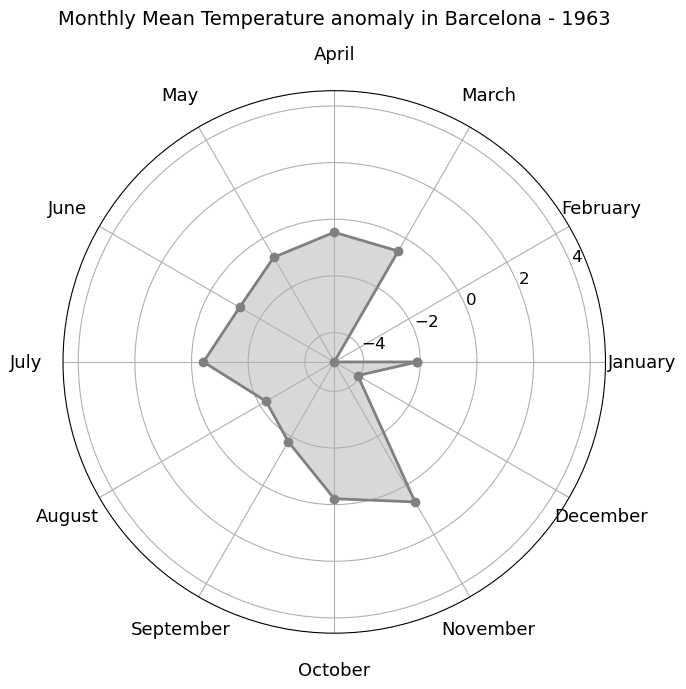

----------------------

#### Partial conclution

It has been observed that the area of the polygon increases with time, which is attributed to rising temperatures, and it could confirm the existence of climate change.

----------------------

<a name="item2.2.2"></a>
### 2.2.2. Bar and line chart monthly temperature anomaly

To analyze monthly temperature over time, I also plotted bar and line plots of mean temperature anomaly vs year in a specific city. Then, I looked for trends in the graph.

In [506]:
def Bar_Monthly(city_name,df):
    
    import matplotlib.pyplot as plt
    from PIL import Image
    import io

    # Get the list of unique months for the city
    unique_month = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

    
    # Calculate the minimum and maximum values for color scaling
    min_value = df[df["Capital City"] == city_name]["Monthly Mean Temperature anomaly"].sort_values(ascending=True).reset_index(drop=True)[0]  # You can adjust this value as needed
    max_value = df[df["Capital City"] == city_name]["Monthly Mean Temperature anomaly"].max()  # You can adjust this value as needed
    
    # Filter data for the specific month and city
    for month in unique_month:

        # Configure matplotlib figure layout
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))
        
                # Create line chart
        ax1 = px.line(data_frame=df[(df["Capital City"] == city_name) & (df["Month"] == month)],
                     x="Year",
                     y="Monthly Mean Temperature anomaly",
                     title=f"Mean Temperature of {month} over at least 60 years in {city_name}")
        
        # Create bar chart
        ax2 = px.bar(data_frame=df[(df["Capital City"] == city_name) & (df["Month"] == month)],
                     x="Year",
                     y="Monthly Mean Temperature anomaly",
                     color="Monthly Mean Temperature anomaly",
                     range_color=[min_value, max_value])  # Color scale limits
                     #title=f"Mean Temperature of {month} over at least 60 years in {city_name}")

        ax2.update_layout(coloraxis_colorscale='Jet', yaxis_range=[min_value, max_value])

        # Show line chart in the first subplot
        ax1.show()

        # Show bar chart in the second subplot
        ax2.show()
    
        # Maximum anomaly
        max_anomaly = df[(df["Capital City"] == city_name) & (df["Month"] == month)].sort_values(by="Monthly Mean Temperature anomaly", ascending=False).iloc[0]
        print(f"{max_anomaly['Year']} was the warmest year for {month}, which was {max_anomaly['Monthly Mean Temperature anomaly']} above the average temperature of at least 60 years.")
        
        # Minimum anomaly
        min_anomaly = df[(df["Capital City"] == city_name) & (df["Month"] == month)].sort_values(by="Monthly Mean Temperature anomaly", ascending=True).iloc[0]
        print(f"{min_anomaly['Year']} was the coldest year for {month}, which was {min_anomaly['Monthly Mean Temperature anomaly']} below the average temperature of at least 60 years.")
        print()
    
    print("---------------------"*5)
    
    # Month with the highest positive anomaly
    max_anomaly_city = df[(df["Capital City"] == city_name)].sort_values(by="Monthly Mean Temperature anomaly", ascending=False).iloc[0]
    print(f"- In {city_name}, the highest temperature was recorded in the year {max_anomaly_city['Year']} in the month of {max_anomaly_city['Month']}. The temperature was {max_anomaly_city['Monthly Mean Temperature anomaly']} degrees above the average temperature.")
    print()
    
    # Month with the highest negative anomaly
    min_anomaly_city = df[(df["Capital City"] == city_name)].sort_values(by="Monthly Mean Temperature anomaly", ascending=True).iloc[0]
    print(f"- In {city_name}, the lowest temperature was recorded in the year {min_anomaly_city['Year']} in the month of {min_anomaly_city['Month']}. The temperature was {min_anomaly_city['Monthly Mean Temperature anomaly']} degrees below the average temperature.")
    print("---------------------"*5)


In [507]:
# Filter data for a city and create GIF
for city in ["Barcelona"]:

# If you would like to see the bar charts of all Capital Cities:
#for city in data_monthly["City"].unique():
    
    city_name = city
    
    Bar_Monthly(city_name,data_monthly)

1996 was the warmest year for January, which was 2.63 above the average temperature of at least 60 years.
1985 was the coldest year for January, which was -4.21 below the average temperature of at least 60 years.



1990 was the warmest year for February, which was 3.75 above the average temperature of at least 60 years.
1963 was the coldest year for February, which was -5.04 below the average temperature of at least 60 years.



2001 was the warmest year for March, which was 3.02 above the average temperature of at least 60 years.
1971 was the coldest year for March, which was -3.54 below the average temperature of at least 60 years.



2011 was the warmest year for April, which was 3.01 above the average temperature of at least 60 years.
1986 was the coldest year for April, which was -2.43 below the average temperature of at least 60 years.



2022 was the warmest year for May, which was 3.35 above the average temperature of at least 60 years.
1984 was the coldest year for May, which was -3.5 below the average temperature of at least 60 years.



2003 was the warmest year for June, which was 4.24 above the average temperature of at least 60 years.
1992 was the coldest year for June, which was -3.4 below the average temperature of at least 60 years.



2022 was the warmest year for July, which was 3.4 above the average temperature of at least 60 years.
1977 was the coldest year for July, which was -3.37 below the average temperature of at least 60 years.



2003 was the warmest year for August, which was 3.79 above the average temperature of at least 60 years.
1977 was the coldest year for August, which was -3.39 below the average temperature of at least 60 years.



1987 was the warmest year for September, which was 2.72 above the average temperature of at least 60 years.
1972 was the coldest year for September, which was -3.44 below the average temperature of at least 60 years.



2022 was the warmest year for October, which was 3.05 above the average temperature of at least 60 years.
1974 was the coldest year for October, which was -4.78 below the average temperature of at least 60 years.



2011 was the warmest year for November, which was 2.62 above the average temperature of at least 60 years.
1966 was the coldest year for November, which was -2.87 below the average temperature of at least 60 years.



1989 was the warmest year for December, which was 2.98 above the average temperature of at least 60 years.
2001 was the coldest year for December, which was -4.56 below the average temperature of at least 60 years.

---------------------------------------------------------------------------------------------------------
- In Barcelona, the highest temperature was recorded in the year 2003 in the month of June. The temperature was 4.24 degrees above the average temperature.

- In Barcelona, the lowest temperature was recorded in the year 1963 in the month of February. The temperature was -5.04 degrees below the average temperature.
---------------------------------------------------------------------------------------------------------


----------------------

#### Parcial conclution

Over the years, there has been a trend of increasing temperature.

----------------------
